# **Oracle Benchmarking** : Empiric Network vs ChainLink

Focusing on LUNA crash period : May 6 to May 25

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
import json
import pandas as pd

from ctc.protocols import chainlink_utils
from src.utils import DataParser, get_selector_from_name, normalize_submit_many_entry, filter_feeds
from src.pipeline import EmpiricNetworkLoader, ChainLinkLoader, KaikoLoader

## Empiric Network Data Retrieval

We will use both StarkNet Sequencer & a synced Node running Pathfinder to retrieve data. Not that it is not yet "verifyable" since there's no P2P syncing between StarkNet nodes yet -> Therefore it's unprovable getting the correct timestamp nor the correct information of a TX.

In [2]:
ENLoader = EmpiricNetworkLoader()

In [ ]:
ENLoader.raw_transactions.head(2)

,type,transaction_hash,max_fee,version,signature,nonce,contract_address,entry_point_selector,calldata,timestamp,function_info,parsed_calldata
0,INVOKE,0x3011775893da9c8e891090abc1a233d6ab8b03bcf6a0...,0x0,0x0,[],0x0,0x4a05a68317edb37d34d29f34193829d7363d51a37068...,0x3451875d57805682e40d0ad8e604fc4cc5f949d14ca8...,"[0x1a, 0x6574682f757364, 0x94b319d3b02e080000,...",1651788073,"{'inputs': [{'name': 'new_entries_len', 'type'...",<src.utils.DataParser object at 0x296262a90>
1,INVOKE,0x16caeadd977519fc24970021bccb84ad936e12e3ec95...,0x0,0x0,[],0x0,0x4a05a68317edb37d34d29f34193829d7363d51a37068...,0x3451875d57805682e40d0ad8e604fc4cc5f949d14ca8...,"[0x1a, 0x6574682f757364, 0x948f77dc12b4780000,...",1651788333,"{'inputs': [{'name': 'new_entries_len', 'type'...",<src.utils.DataParser object at 0x177b981f0>


In [ ]:
ENLoader.price_feeds

,timestamp,price,feed,date
0,1651788073,3.006213e-02,luna/eth,2022-05-05 22:01:13
1,1651788333,3.016095e-02,luna/eth,2022-05-05 22:05:33
2,1651788644,3.029866e-02,luna/eth,2022-05-05 22:10:44
3,1651789012,3.029951e-02,luna/eth,2022-05-05 22:16:52
4,1651789283,3.026009e-02,luna/eth,2022-05-05 22:21:23
...,...,...,...,...
57472,1653601741,7.327244e-08,luna/eth,2022-05-26 21:49:01
57473,1653601902,7.341559e-08,luna/eth,2022-05-26 21:51:42
57474,1653602019,7.350528e-08,luna/eth,2022-05-26 21:53:39
57475,1653602165,7.209940e-08,luna/eth,2022-05-26 21:56:05


## ChainLink Data Retrieval

We will use a node to get dedicated Events for the LUNA / ETH feed (there's no LUNA / USD feed).

In [ ]:
CLLoader = await ChainLinkLoader()

In [ ]:
CLLoader.raw_transactions.head()

,block_number,transaction_index,log_index,address,block_hash,transaction_hash,contract_address,event_name,event_hash,arg__current,arg__roundId,arg__updatedAt
0,14721064,23,31,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xc66712513667503e85e377eb0ee823acc2d0213a2a65...,0x2caddb79c3cf9d375cf40e22ab709576542b064ab400...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,29525410408662240,1293,1651806255
1,14726397,94,125,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xeae18414cd27f8a3ee58e07804d2fbc7c998635d10fc...,0xe227f918d4c70ae1065253e62ccb1b712f0e4c281957...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,28909806872610724,1294,1651879141
2,14727610,44,36,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xcc779d093bf4a908a5ec7f00af26de51a0db8168696e...,0x5b09ad9ee5fd974d046c845eb6d30c85534288e96081...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,28312498091524703,1295,1651896119
3,14727696,36,45,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0x39d047dfc5889536772b903a9bf93c0472bd0e2e00b9...,0x8ba10d0269c30f34c5ef0364a8141a732a1e14610d37...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,27695020000000000,1296,1651897383
4,14731234,74,156,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xb5369a9635b29294c189a6db2683dfebe4d1b84f9394...,0x879d12a6f7edf0a8ad11e391e95ebaa050f4d26cdd7e...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,27138650461100180,1297,1651945957


In [ ]:
CLLoader.price_feeds

,price,timestamp,feed,date
0,2.952541e-02,1651806255,luna/eth,2022-05-06 03:04:15
1,2.890981e-02,1651879141,luna/eth,2022-05-06 23:19:01
2,2.831250e-02,1651896119,luna/eth,2022-05-07 04:01:59
3,2.769502e-02,1651897383,luna/eth,2022-05-07 04:23:03
4,2.713865e-02,1651945957,luna/eth,2022-05-07 17:52:37
...,...,...,...,...
3090,7.983700e-08,1653606091,luna/eth,2022-05-26 23:01:31
3091,7.811800e-08,1653606336,luna/eth,2022-05-26 23:05:36
3092,8.022700e-08,1653606420,luna/eth,2022-05-26 23:07:00
3093,8.249302e-08,1653606793,luna/eth,2022-05-26 23:13:13


## Empiric VS ChainLink

In [ ]:
ENLoader.price_feeds.head()

,timestamp,price,feed,date
0,1651788073,0.030062,luna/eth,2022-05-05 22:01:13
1,1651788333,0.030161,luna/eth,2022-05-05 22:05:33
2,1651788644,0.030299,luna/eth,2022-05-05 22:10:44
3,1651789012,0.030300,luna/eth,2022-05-05 22:16:52
4,1651789283,0.030260,luna/eth,2022-05-05 22:21:23


In [ ]:
CLLoader.price_feeds.head()

,price,timestamp,feed,date
0,0.029525,1651806255,luna/eth,2022-05-06 03:04:15
1,0.028910,1651879141,luna/eth,2022-05-06 23:19:01
2,0.028312,1651896119,luna/eth,2022-05-07 04:01:59
3,0.027695,1651897383,luna/eth,2022-05-07 04:23:03
4,0.027139,1651945957,luna/eth,2022-05-07 17:52:37


<AxesSubplot: xlabel='date'>

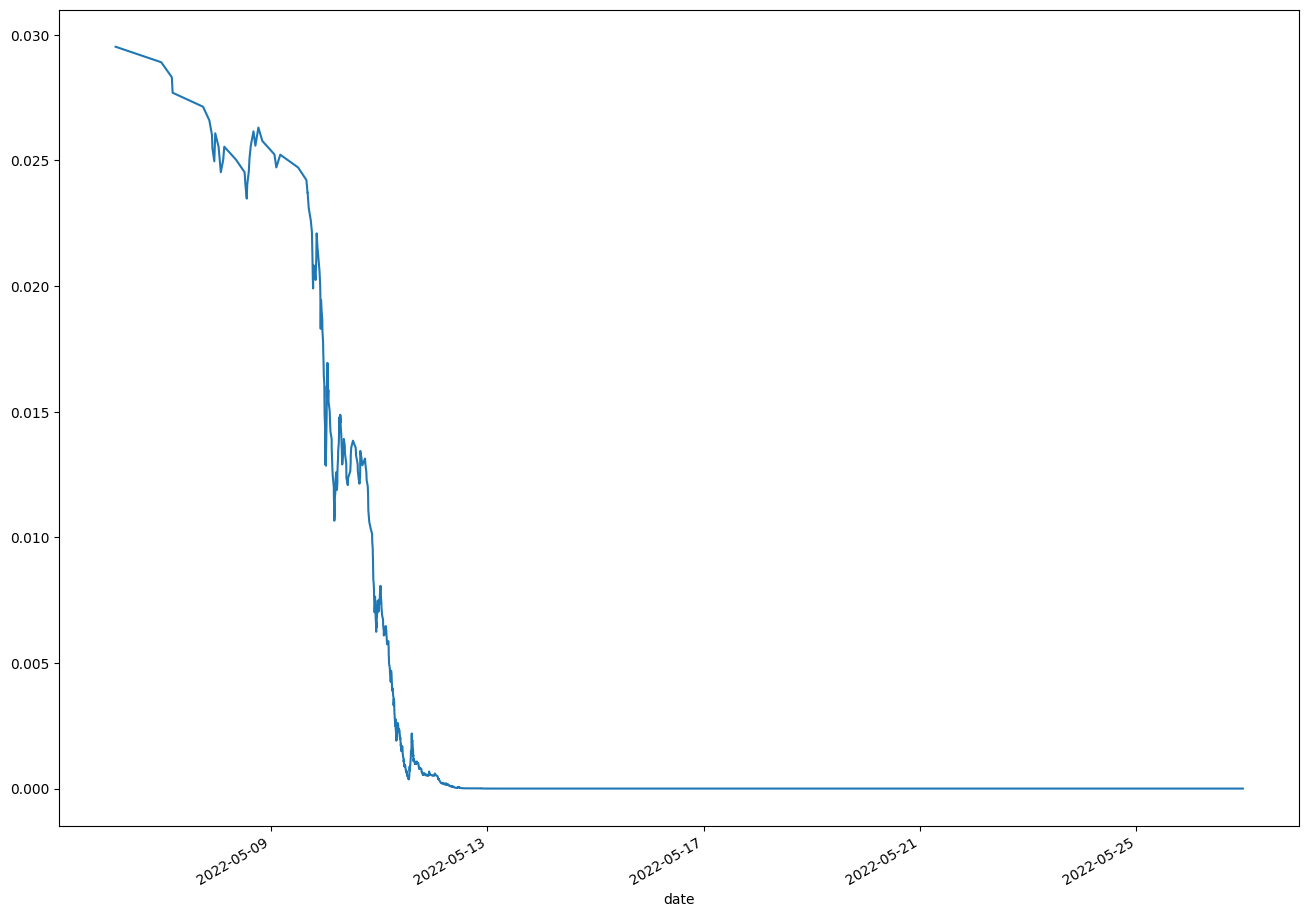

In [ ]:
CLLoader.price_feeds = CLLoader.price_feeds.set_index('date')
CLLoader.price_feeds['price'].plot(figsize=(16, 12))

<AxesSubplot: xlabel='date'>

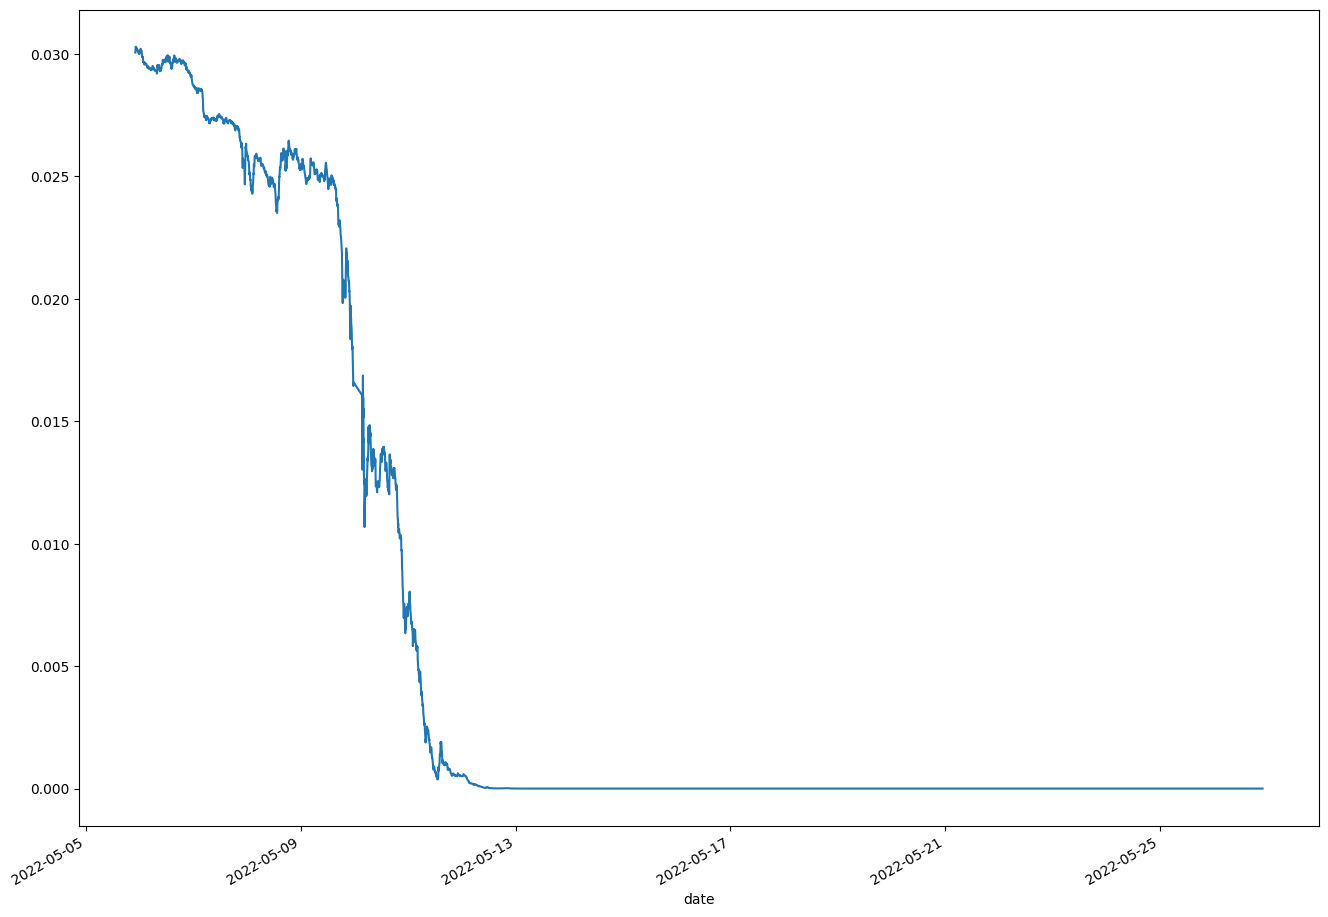

In [ ]:
ENLoader.price_feeds = ENLoader.price_feeds.set_index('date')
ENLoader.price_feeds['price'].plot(figsize=(16, 12))

Plotting EN versus ChainLink : 
- Without scale at first
- Log Scaling secondly

In [ ]:
import matplotlib.pyplot as plt

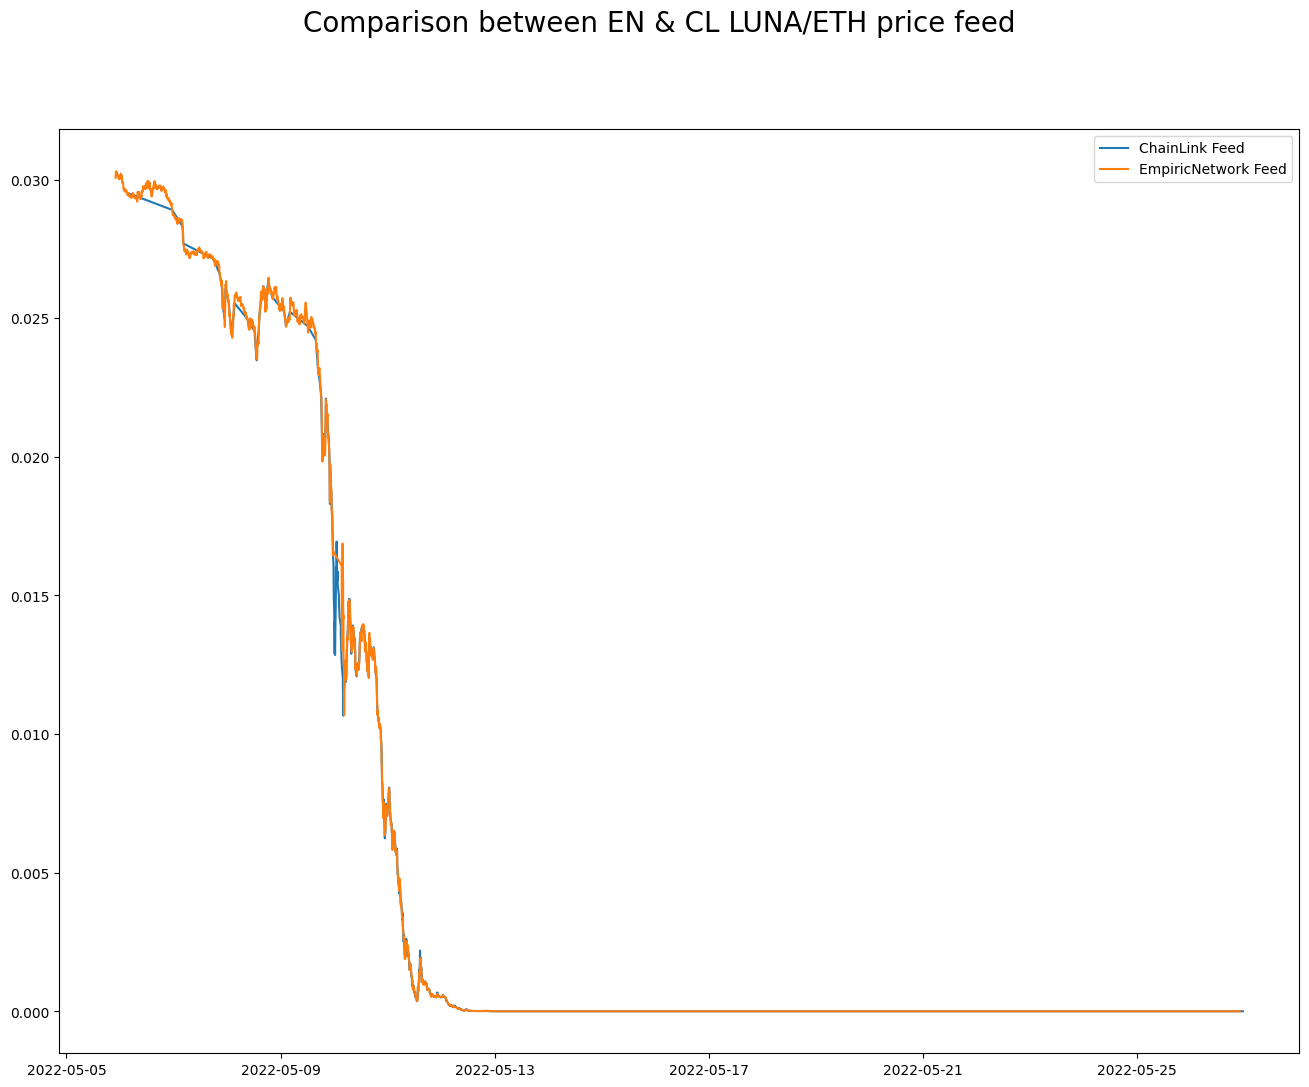

In [ ]:
fig = plt.figure(figsize=(16, 12))

for feed, name in [(CLLoader.price_feeds, "ChainLink Feed"), (ENLoader.price_feeds, "EmpiricNetwork Feed")]:
    plt.plot(feed.index, feed['price'], label=name)
plt.legend(loc="upper right")
plt.suptitle('Comparison between EN & CL LUNA/ETH price feed', fontsize=20)
plt.show()

At this points, we are not seeing this much difference. It might be interesting to focus on lower timeframes or to plot using a logarithm scale.

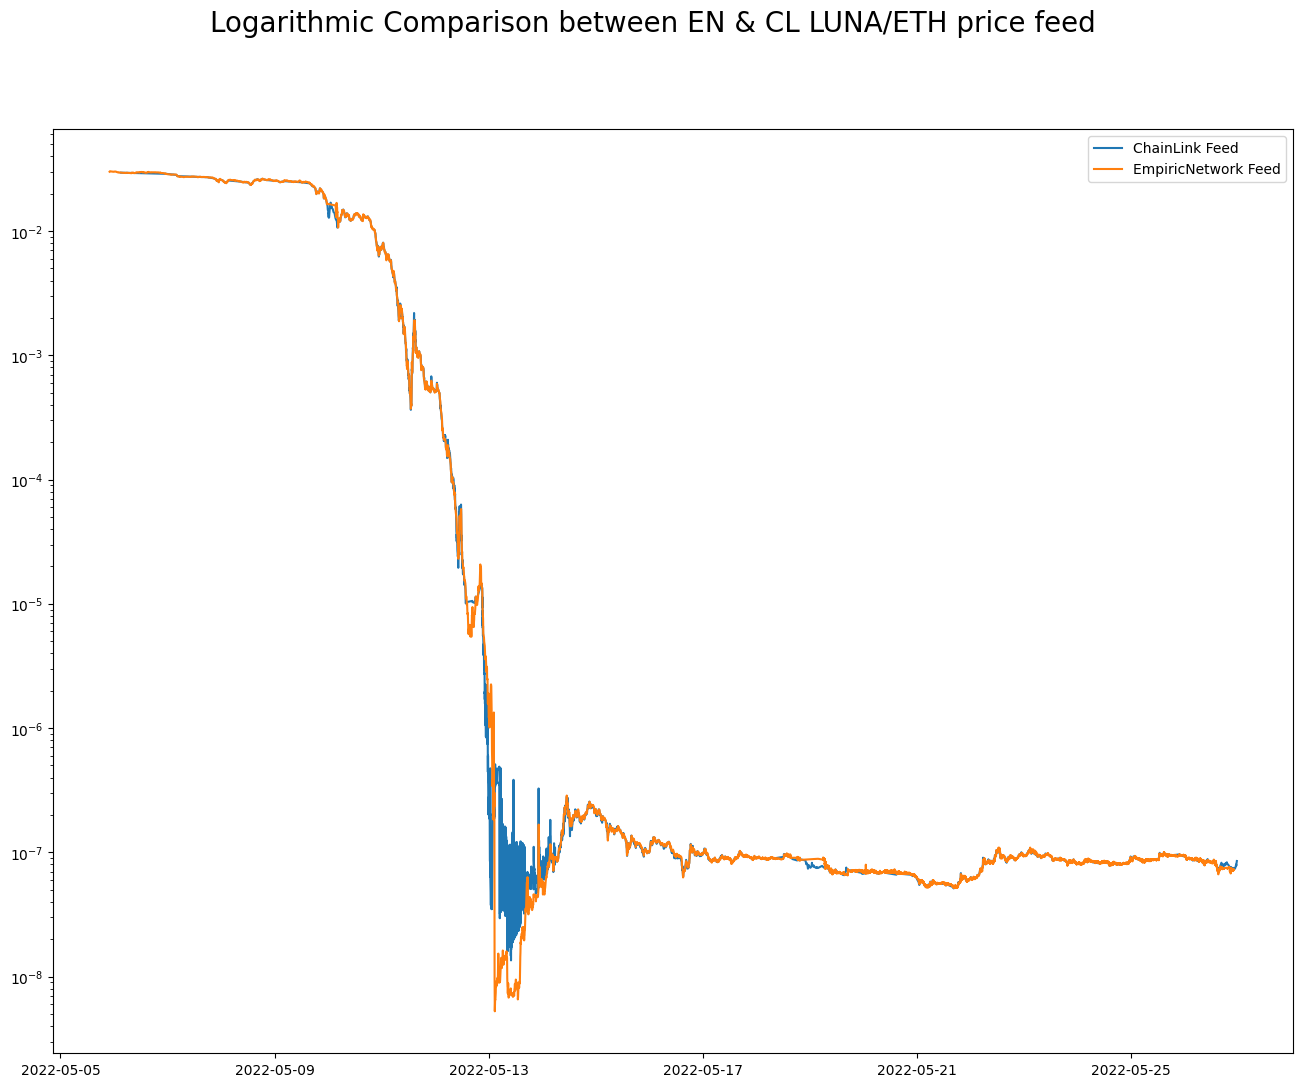

In [ ]:
fig = plt.figure(figsize=(16, 12))

for feed, name in [(CLLoader.price_feeds, "ChainLink Feed"), (ENLoader.price_feeds, "EmpiricNetwork Feed")]:
    plt.plot(feed.index, feed['price'], label=name)
plt.legend(loc="upper right")
plt.yscale('log')
plt.suptitle('Logarithmic Comparison between EN & CL LUNA/ETH price feed', fontsize=20)
plt.show()

As we can see, there is a interesting behavior from the ChainLink Oracle  on the 13th of May, with a price feed that is flip-flopping.
Let's study this more closely

## May 13th

In [ ]:
CLLoader.price_feeds = CLLoader.price_feeds[CLLoader.price_feeds.timestamp > 1652275000]
CLLoader.price_feeds = CLLoader.price_feeds[CLLoader.price_feeds.timestamp < 1652600000]
ENLoader.price_feeds = ENLoader.price_feeds[ENLoader.price_feeds.timestamp > 1652275000]
ENLoader.price_feeds = ENLoader.price_feeds[ENLoader.price_feeds.timestamp < 1652600000]

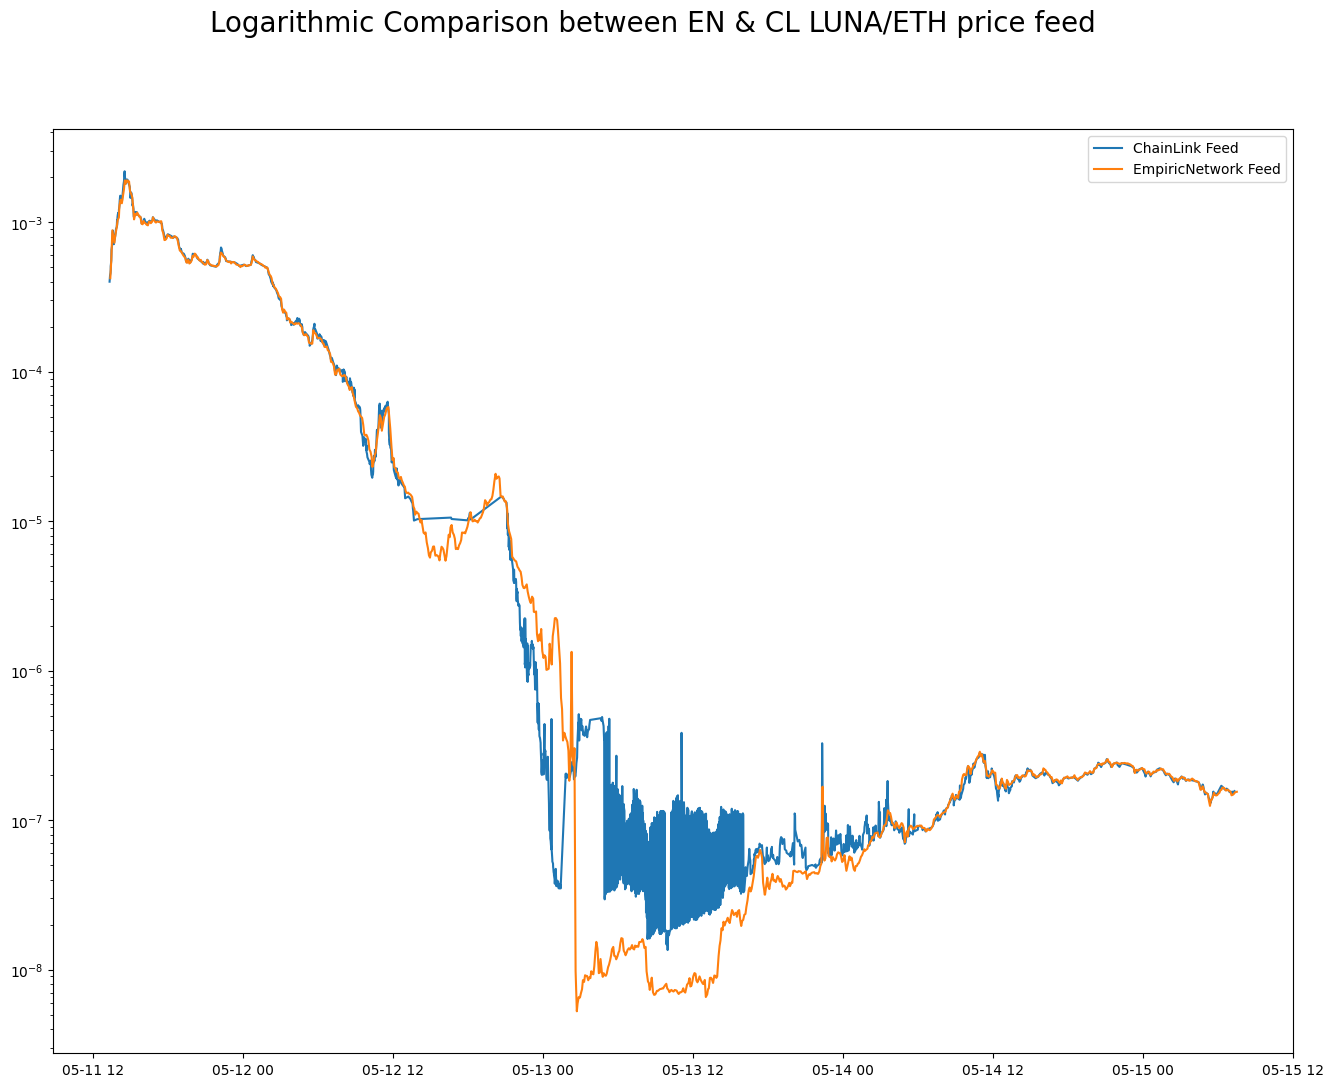

In [ ]:
fig = plt.figure(figsize=(16, 12))

for feed, name in [(CLLoader.price_feeds, "ChainLink Feed"), (ENLoader.price_feeds, "EmpiricNetwork Feed")]:
    plt.plot(feed.index, feed['price'], label=name)
plt.legend(loc="upper right")
plt.yscale('log')
plt.suptitle('Logarithmic Comparison between EN & CL LUNA/ETH price feed', fontsize=20)
plt.show()

On the 12th at 10 p.m, the discrepencey between both assets started having sometimes more than a $10^2$ digit difference. This had a huge impact on market as LUNA price was possibly innacurate for almost an entire 24h period of time.

# Reference Benchmark using Kaiko data

In [ ]:
KLoader = KaikoLoader()

In [ ]:
KLoader.data = KLoader.data.dropna(subset=['price'])

In [ ]:
KLoader.data.head()

,timestamp,price,volume,count,sources,date
0,1653523200000,9.000091e-08,6206773.186565,13,"[{'exchange_code': 'bfnx', 'count': 13, 'price...",2022-05-26 00:00:00
2,1653516000000,9.945843e-08,6347931.183639,10,"[{'exchange_code': 'bfnx', 'count': 10, 'price...",2022-05-25 22:00:00
3,1653512400000,1.000000e-07,3777.662817,3,"[{'exchange_code': 'bfnx', 'count': 3, 'price'...",2022-05-25 21:00:00
4,1653508800000,1.000000e-07,31882.616154,7,"[{'exchange_code': 'bfnx', 'count': 7, 'price'...",2022-05-25 20:00:00
5,1653505200000,1.022039e-07,54171.622344999996,12,"[{'exchange_code': 'bfnx', 'count': 12, 'price...",2022-05-25 19:00:00


<AxesSubplot: xlabel='date'>

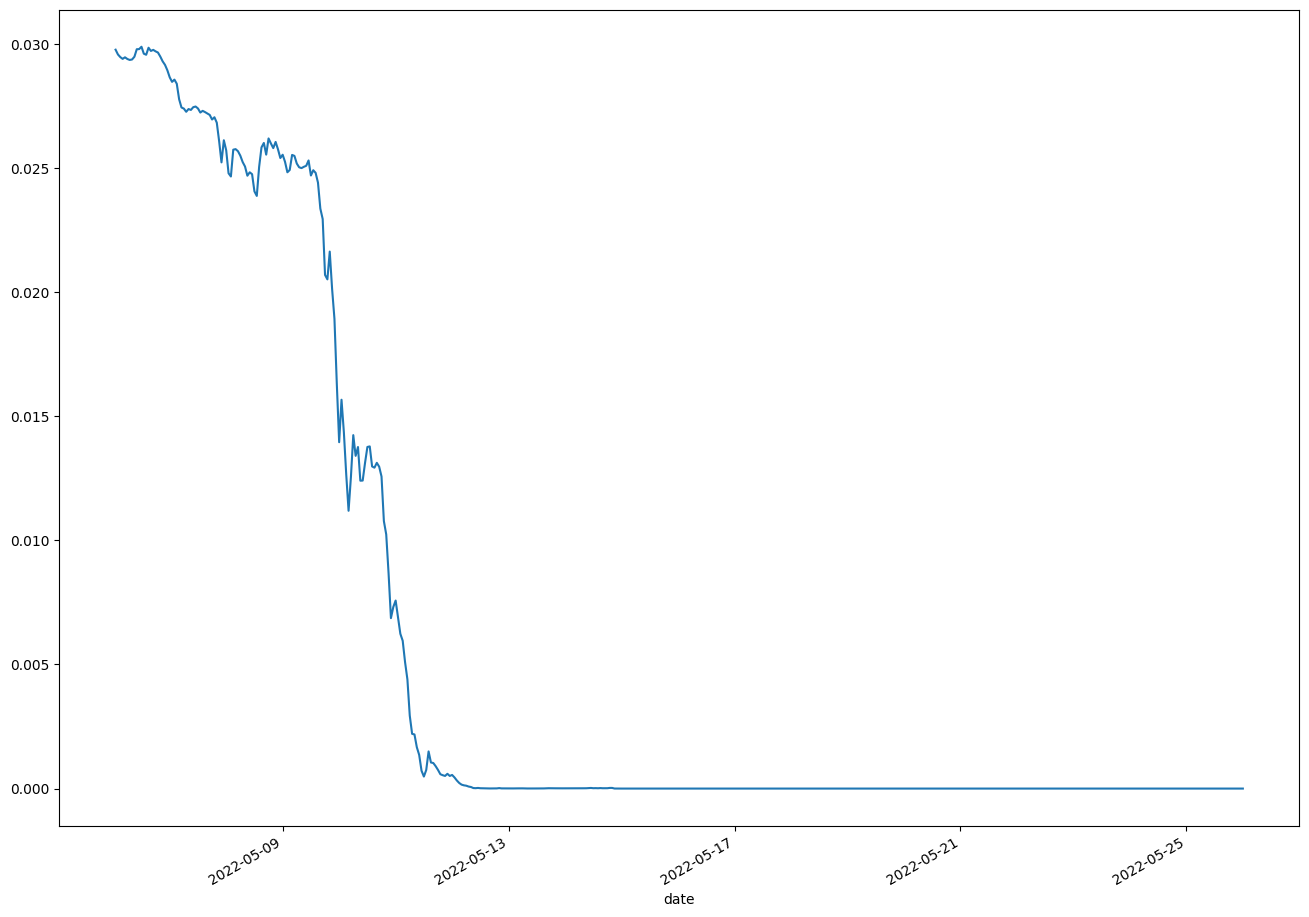

In [ ]:
KLoader.data = KLoader.data.set_index('date')
KLoader.data['price'].plot(figsize=(16, 12))

In [ ]:
KLoader.data = KLoader.data[KLoader.data.timestamp > 1652275000000]
KLoader.data = KLoader.data[KLoader.data.timestamp < 1652600000000]

In [ ]:
KLoader.data

,timestamp,price,volume,count,sources
date,,,,,
2022-05-15 07:00:00,1652598000000,1.676771e-07,2291821.189956,34,"[{'exchange_code': 'bfnx', 'count': 34, 'price..."
2022-05-15 06:00:00,1652594400000,1.737754e-07,279880.831618,9,"[{'exchange_code': 'bfnx', 'count': 9, 'price'..."
2022-05-15 05:00:00,1652590800000,1.514848e-07,1611741.88454493,63,"[{'exchange_code': 'bfnx', 'count': 63, 'price..."
2022-05-15 04:00:00,1652587200000,1.735877e-07,2239401.94037986,62,"[{'exchange_code': 'bfnx', 'count': 62, 'price..."
2022-05-15 03:00:00,1652583600000,2.073328e-07,121951.769226,10,"[{'exchange_code': 'bfnx', 'count': 10, 'price..."
...,...,...,...,...,...
2022-05-11 18:00:00,1652292000000,7.510510e-04,15066.40576532,251,"[{'exchange_code': 'bfnx', 'count': 251, 'pric..."
2022-05-11 17:00:00,1652288400000,9.024494e-04,22299.45483091,293,"[{'exchange_code': 'bfnx', 'count': 293, 'pric..."
2022-05-11 16:00:00,1652284800000,1.029570e-03,2025.7116723700003,154,"[{'exchange_code': 'bfnx', 'count': 154, 'pric..."


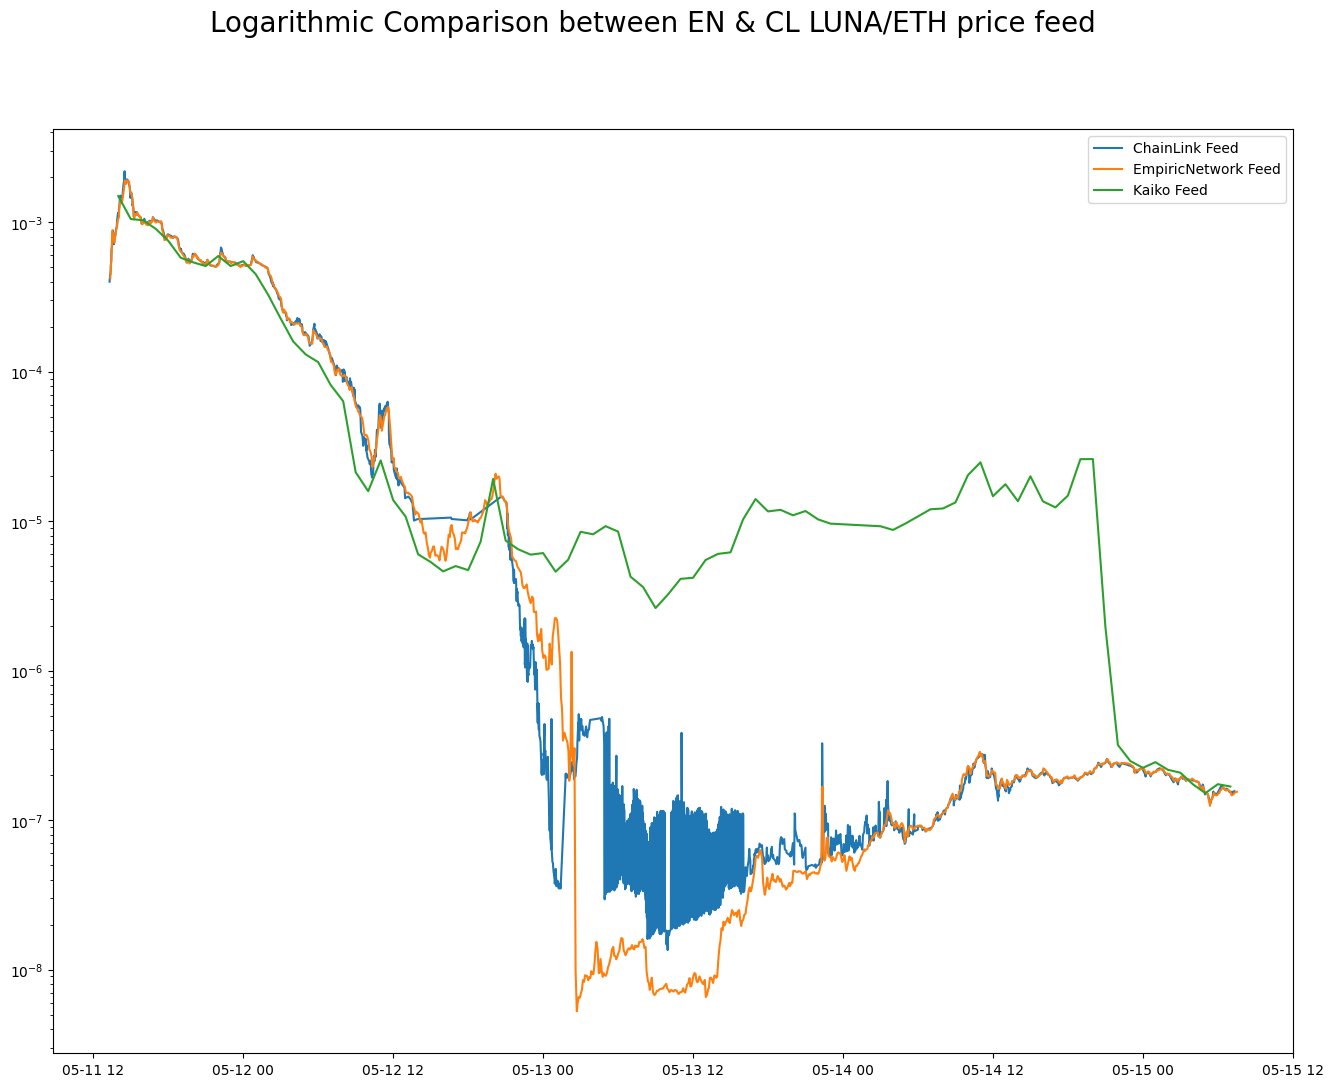

In [ ]:
fig = plt.figure(figsize=(16, 12))

for feed, name in [(CLLoader.price_feeds, "ChainLink Feed"), (ENLoader.price_feeds, "EmpiricNetwork Feed"), (KLoader.data, "Kaiko Feed")]:
    plt.plot(feed.index, feed['price'], label=name)
plt.legend(loc="upper right")
plt.yscale('log')
plt.suptitle('Logarithmic Comparison between EN & CL LUNA/ETH price feed', fontsize=20)
plt.show()